## Exploratory Data Analysis on Teleco customer Churn

### Problem Statement :
In the telecom industry customers have a multitude of options to choose from for their communication and internet needs. customers are very critical about the kind of services they receive, often judging an entire company based on a single experience. The ubiquity of these services in daily life has led to a sense of dependency, making even brief disruptions, such as a 30-minute
maintenance break, a source of anxiety for users. This highlights the taken-for-granted attitude towards these services and underscores the importance of churn analysis. churn rate is a key indicator, measures the number of customers who cancel or fail to renew their subsciption with a company. A high churn rate indicates a sgnificant loss of customers, directly affecting revenue and profitability. Therefore it is very crutial for telecom companies to conduct thorough churn analysis to identify the underlying causes of customer attrition and develop targeted strategies to improve customer retention.

By analyzing churn patterns and trends telecom companies can identify area for improvment, Drive business growth and improve customer experience.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Import Dataset

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Info

In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Data Cleaning Techniques

In [13]:
# Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Imputation (filling missing values with mean)
df['TotalCharges'].fillna(df['TotalCharges'].mean())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [16]:
# Deletion (dropping rows with missing values)
df.dropna(subset=['TotalCharges'], inplace=True)

In [17]:
# Handling duplicates
df.drop_duplicates(inplace=True)

In [18]:
# Outlier detection using z-score
z = np.abs(stats.zscore(df['MonthlyCharges']))
df = df[(z < 3)]

In [19]:
# error correction
df['gender'] = df['gender'].replace({'Male': 'M', 'Female': 'F'})
df.head()

customerID gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG      F             0     Yes         No       1           No   
1  5575-GNVDE      M             0      No         No      34          Yes   
2  3668-QPYBK      M             0      No         No       2          Yes   
3  7795-CFOCW      M             0      No         No      45           No   
4  9237-HQITU      F             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [20]:
# Explore categorical features
for col in df.select_dtypes(include=['object']).columns:
  print(f"\nColumn: {col}")
  print(df[col].value_counts())


Column: customerID
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64

Column: gender
gender
M    3549
F    3483
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015


In [21]:
# Explore numerical features
for col in df.select_dtypes(include=['number']).columns:
  print(f"\nColumn: {col}")
  print(df[col].describe())


Column: tenure
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Column: MonthlyCharges
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Column: TotalCharges
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


### Data Visualization Basics 

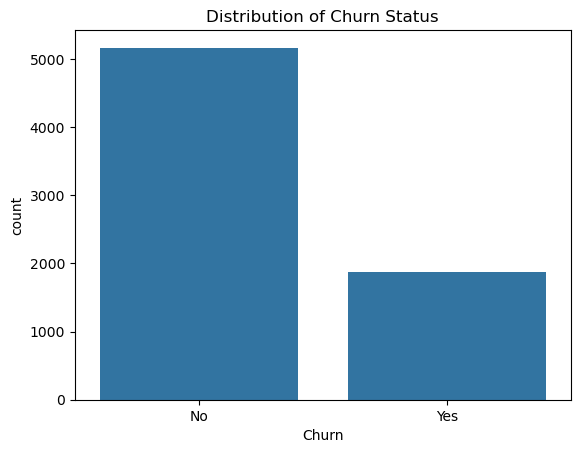

In [23]:
# Visualize churn status
sns.countplot(x='Churn', data=df) 
plt.title('Distribution of Churn Status')
plt.show()

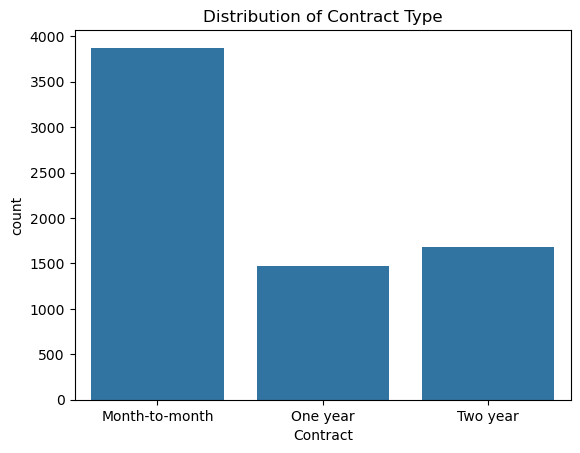

In [25]:
# Visualize contract type
sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract Type')
plt.show()

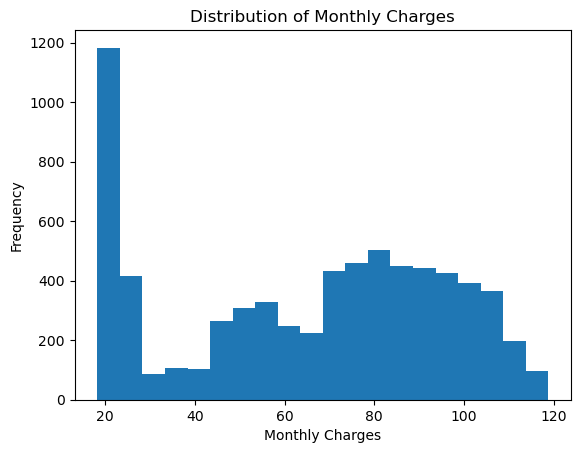

In [37]:
# Visualize monthly charges distribution
plt.hist(df['MonthlyCharges'], bins=20)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

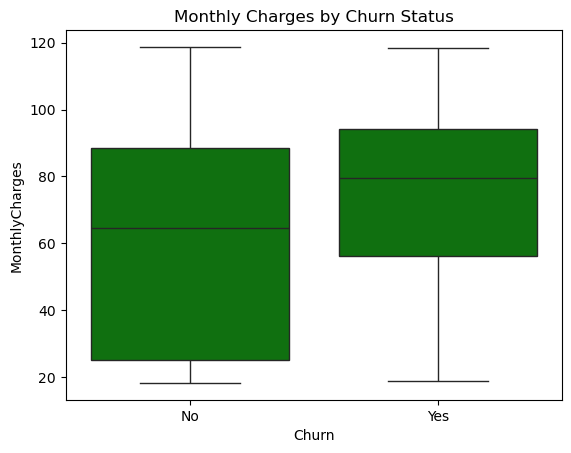

In [43]:
# Box plot of monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, color='green')
plt.title('Monthly Charges by Churn Status')
plt.show()

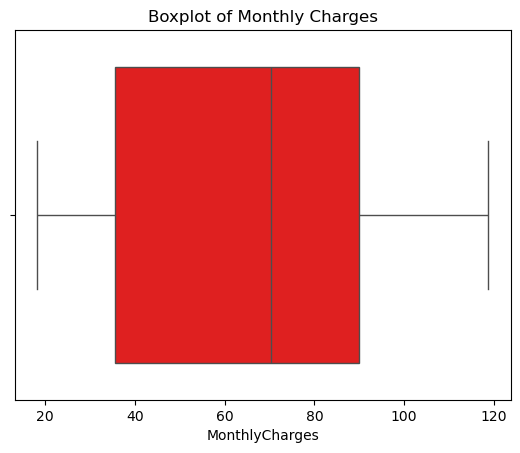

In [44]:
# Identify outliers in MonthlyCharges
sns.boxplot(x=df['MonthlyCharges'], color='red')
plt.title('Boxplot of Monthly Charges')
plt.show()

### Univariate analysis

In [47]:
# Group data by gender and churn
gender_churn = df.groupby(['gender', 'Churn'])['customerID'].count().reset_index(name='count')

In [49]:
# Calculate churn rate for each gender
gender_churn['churn_rate'] = gender_churn.groupby('gender')['count'].transform(lambda x: x / x.sum())

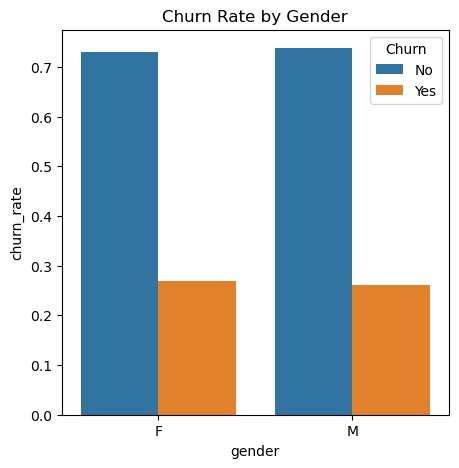

In [50]:
# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x='gender', y='churn_rate', hue='Churn', data=gender_churn)
plt.title('Churn Rate by Gender')
plt.show()

In [52]:
# Group data by SeniorCitizen and churn
senior_churn = df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count().reset_index(name='count')

In [53]:
# Calculate churn rate for each SeniorCitizen group
senior_churn['churn_rate'] = senior_churn.groupby('SeniorCitizen')['count'].transform(lambda x: x / x.sum())

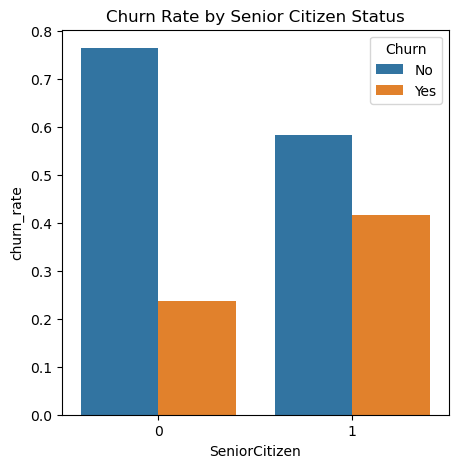

In [58]:
# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x='SeniorCitizen', y='churn_rate', hue='Churn', data=senior_churn)
plt.title('Churn Rate by Senior Citizen Status')
plt.show()

In [59]:
# Select demographic features
demographics = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']]

In [60]:
# Convert categorical features to numerical
demographics = pd.get_dummies(demographics, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn'])

In [61]:
# Calculate the correlation matrix
corr_matrix = demographics.corr()

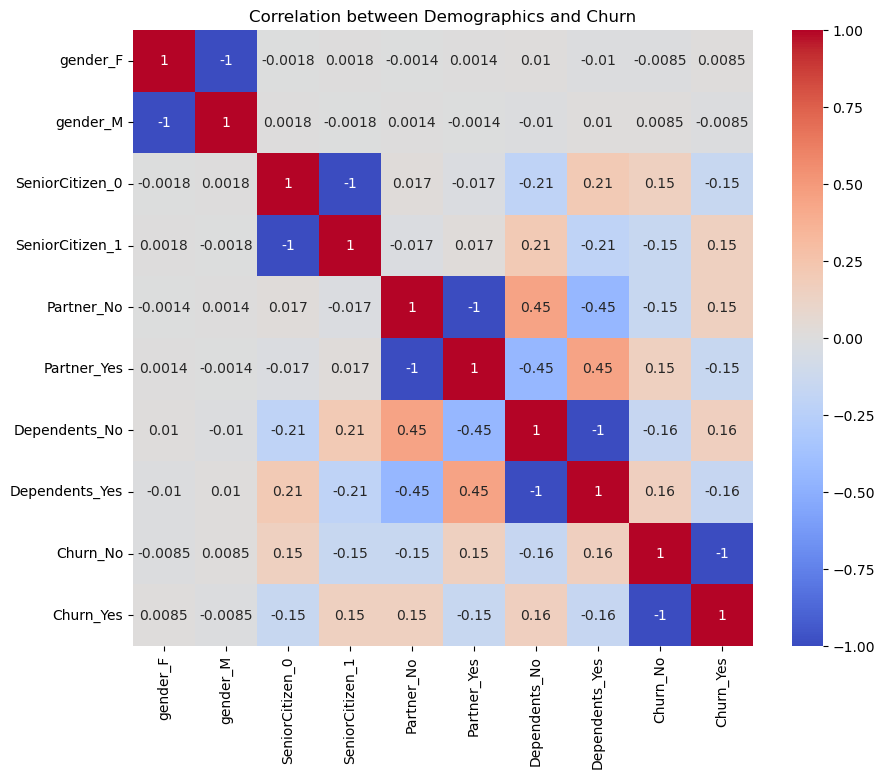

In [62]:
# Create the heatmap to visualize the relationship between demographics and churn rate.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Demographics and Churn')
plt.show()

In [63]:
# Calculate the churn rate
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.58%


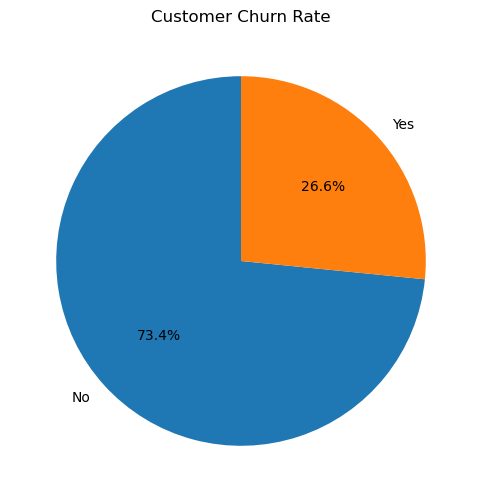

In [64]:
# Visualize churn rate
plt.figure(figsize=(6, 6))
plt.pie(df['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Rate')
plt.show()

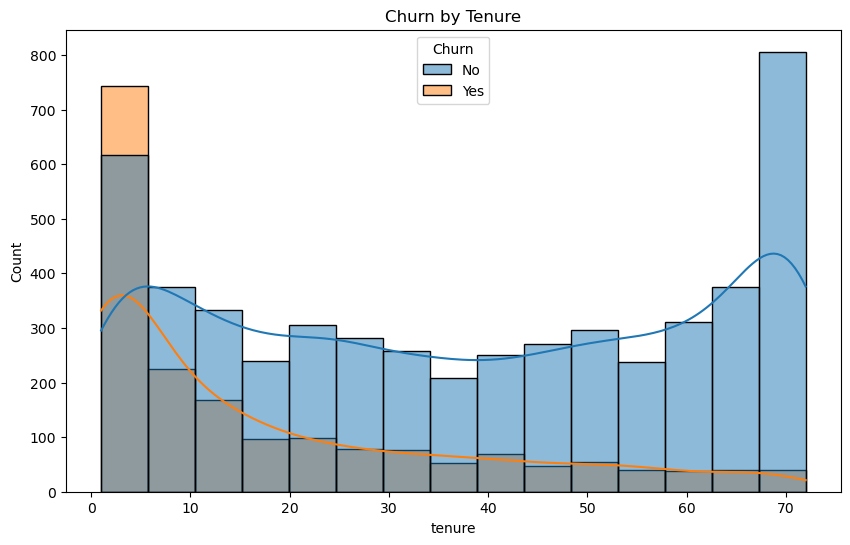

In [65]:
# Analyze churn by tenure
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df, kde=True)
plt.title('Churn by Tenure')
plt.show()

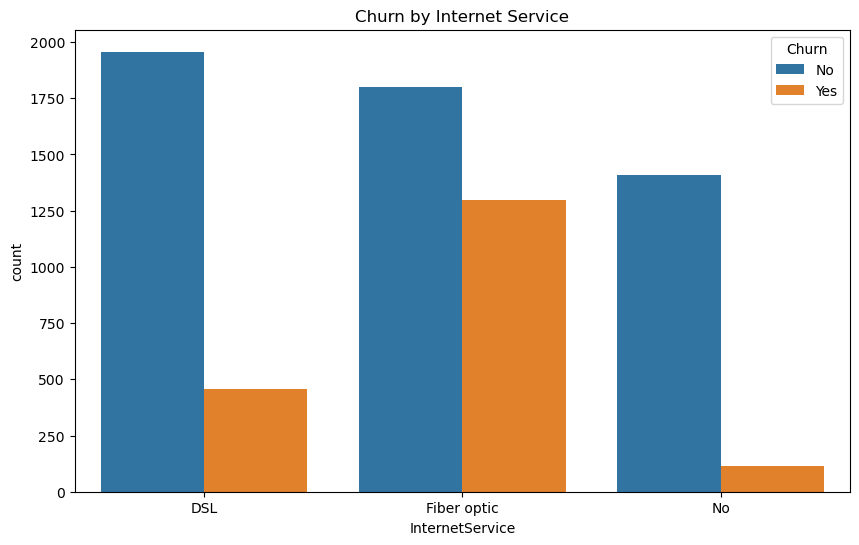

In [66]:
# Analyze churn by InternetService
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

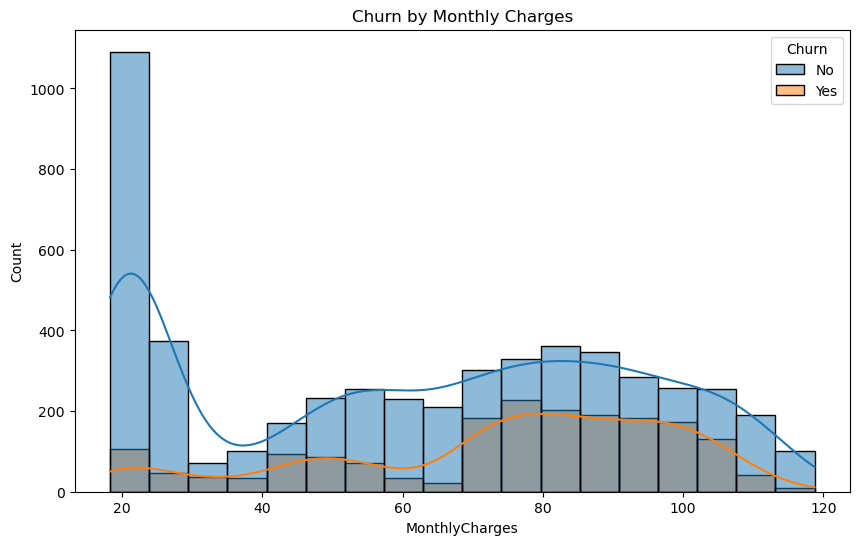

In [67]:
# Analyze churn by MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(x='MonthlyCharges', hue='Churn', data=df, kde=True)
plt.title('Churn by Monthly Charges')
plt.show()

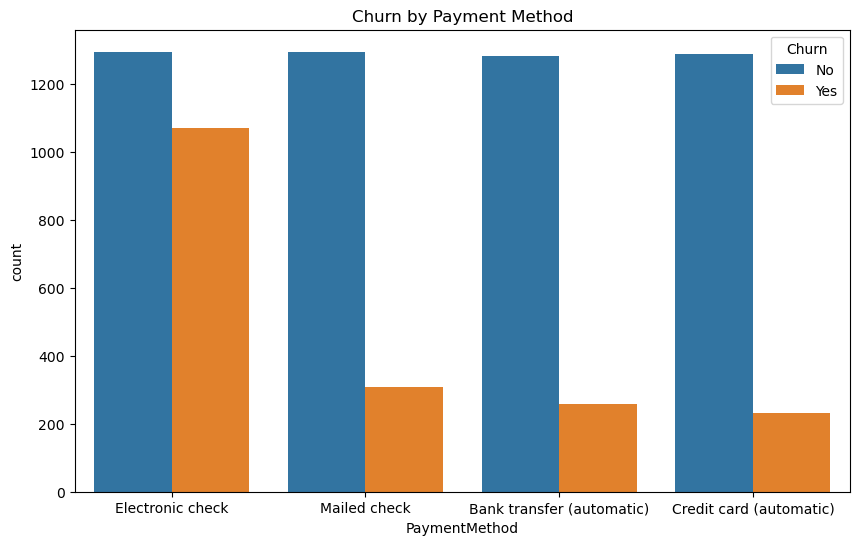

In [68]:
# Analyze churn by payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.show()

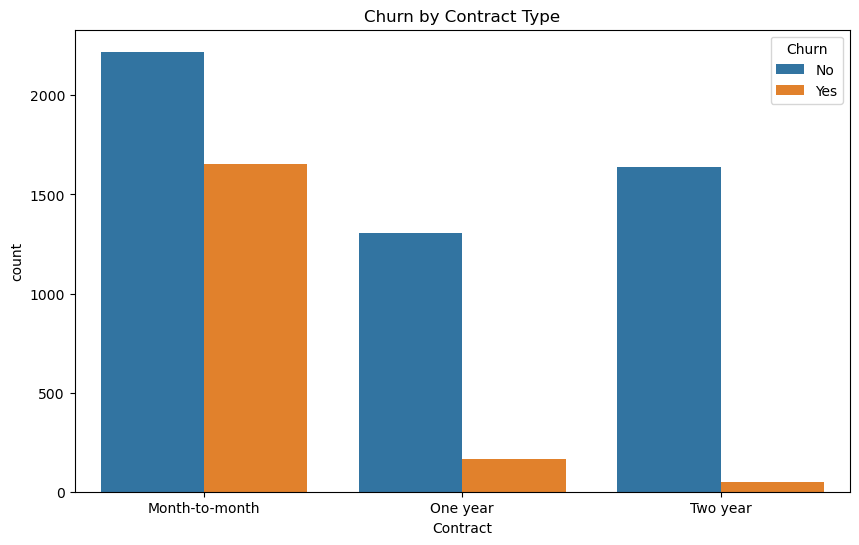

In [69]:
# Analyze churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

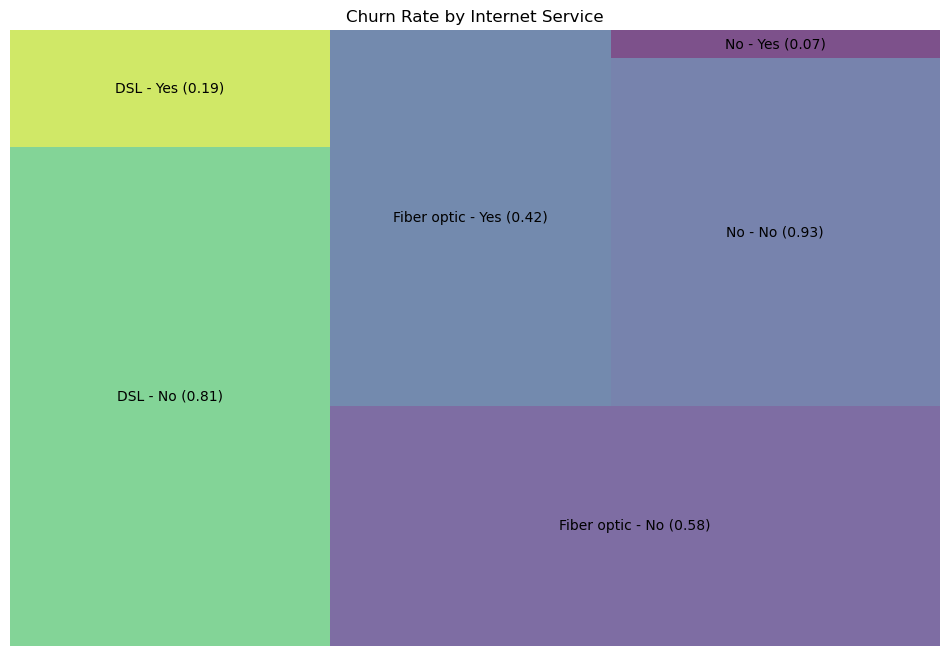

In [70]:
import squarify
service_churn = df.groupby(['InternetService', 'Churn'])['customerID'].count().reset_index(name='count')
service_churn['churn_rate'] = service_churn.groupby('InternetService')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(12, 8))
squarify.plot(sizes=service_churn['count'], label=service_churn['InternetService'] + ' - ' + service_churn['Churn'] + ' (' + service_churn['churn_rate'].apply(lambda x: f"{x:.2f}") + ')', alpha=.7)
plt.axis('off')
plt.title('Churn Rate by Internet Service')
plt.show()

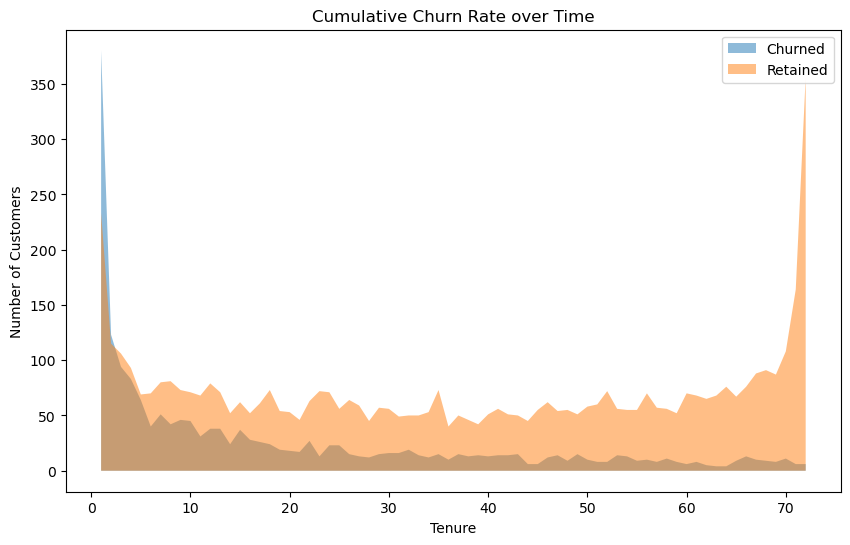

In [71]:

churn_by_tenure = df.groupby(['tenure', 'Churn'])['customerID'].count().reset_index(name='count')

churned_df = churn_by_tenure[churn_by_tenure['Churn'] == 'Yes'].sort_values('tenure')
retained_df = churn_by_tenure[churn_by_tenure['Churn'] == 'No'].sort_values('tenure')


plt.figure(figsize=(10, 6))
plt.fill_between(churned_df['tenure'], churned_df['count'], label='Churned', alpha=0.5)
plt.fill_between(retained_df['tenure'], retained_df['count'], label='Retained', alpha=0.5)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Cumulative Churn Rate over Time')
plt.legend()
plt.show()

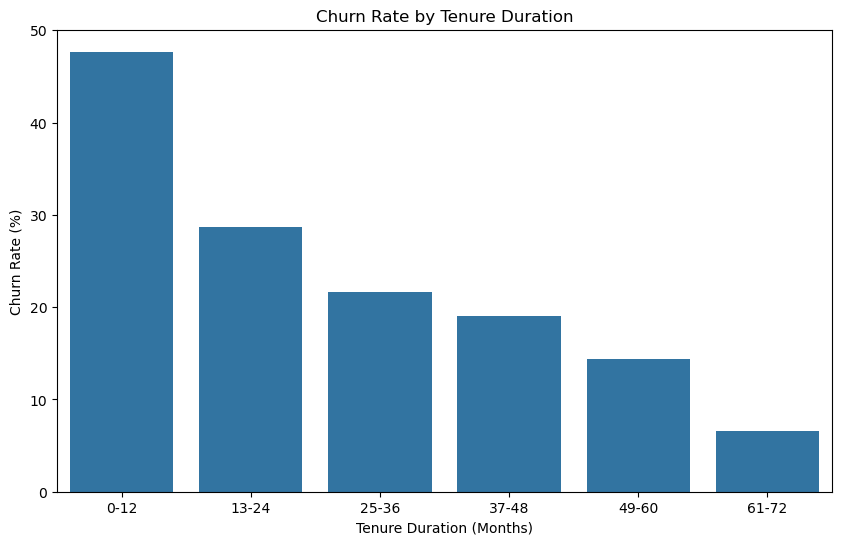

In [73]:

df['tenure_bins'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                             labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])


churn_by_tenure = df.groupby(['tenure_bins', 'Churn'], observed=True)['customerID'].count().unstack()


churn_by_tenure['Churn_Rate'] = (churn_by_tenure['Yes'] / 
                                 (churn_by_tenure['Yes'] + churn_by_tenure['No'])) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_tenure.index, y='Churn_Rate', data=churn_by_tenure)
plt.title('Churn Rate by Tenure Duration')
plt.xlabel('Tenure Duration (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()

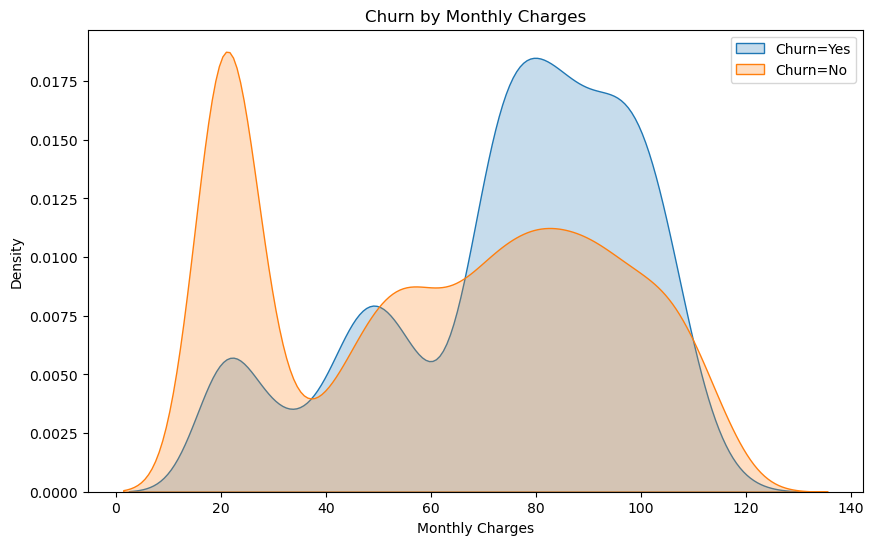

In [80]:
#create a graph for churn by day charges using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn=Yes', fill=True)
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='Churn=No', fill=True)
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

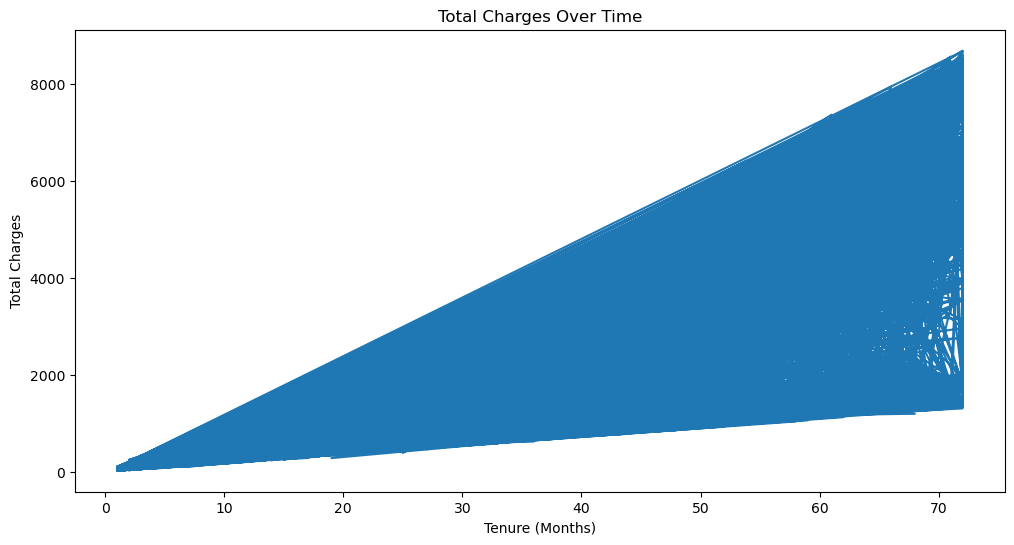

In [81]:
# Create a time series plot of TotalCharges over time.
plt.figure(figsize=(12, 6))
plt.plot(df['tenure'], df['TotalCharges'])
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.title('Total Charges Over Time')
plt.show()

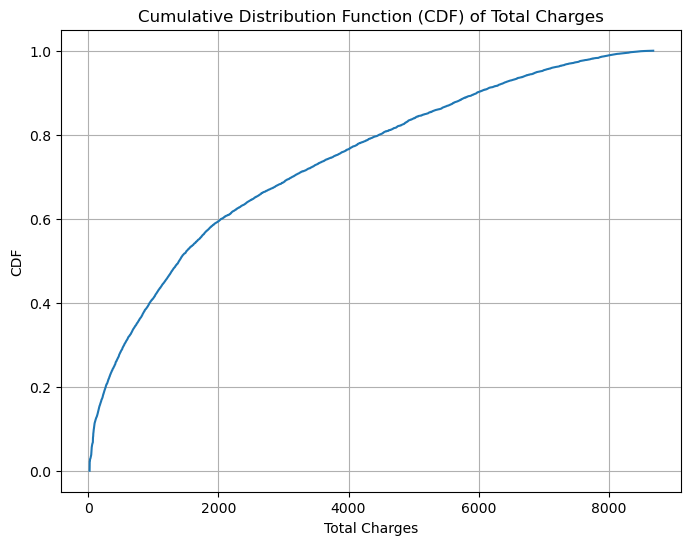

In [82]:
# Calculate the CDF
sorted_data = np.sort(df['TotalCharges'])
yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, yvals)
plt.xlabel('Total Charges')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Total Charges')
plt.grid(True)
plt.show()

In [83]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [85]:
#Interaction between tenure and MonthlyCharges
df['Tenure_MonthlyCharges_Interaction'] = df['tenure'] * df['MonthlyCharges']

Handle Multicollinearity using PCA

In [89]:
# Select numerical features for PCA
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Tenure_MonthlyCharges_Interaction']
X = df[numerical_features]

In [90]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [92]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

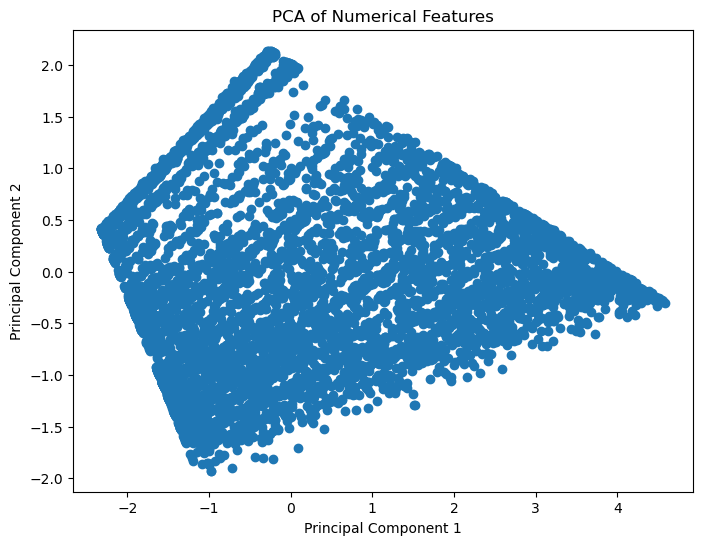

In [94]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate PCA components with the original DataFrame
df = pd.concat([df, pca_df], axis=1)

# Visualize PCA results (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numerical Features')
plt.show()

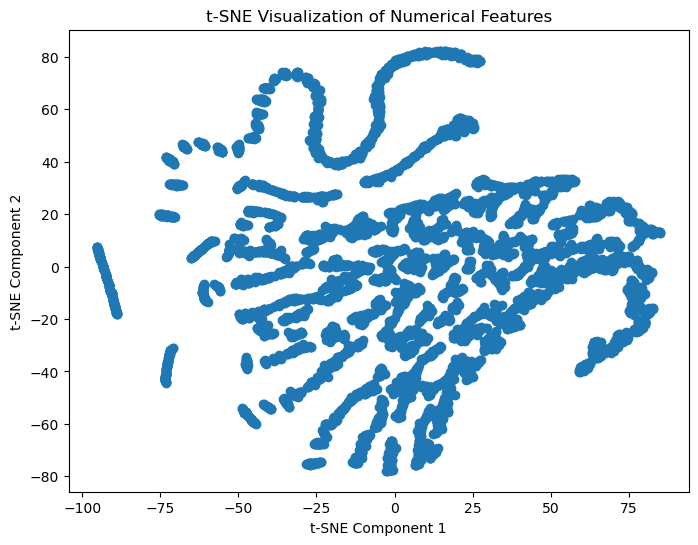

In [95]:
# t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Numerical Features')
plt.show()

In [96]:
# Log transformation of 'TotalCharges'
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

# Binarization of 'Churn'
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [98]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

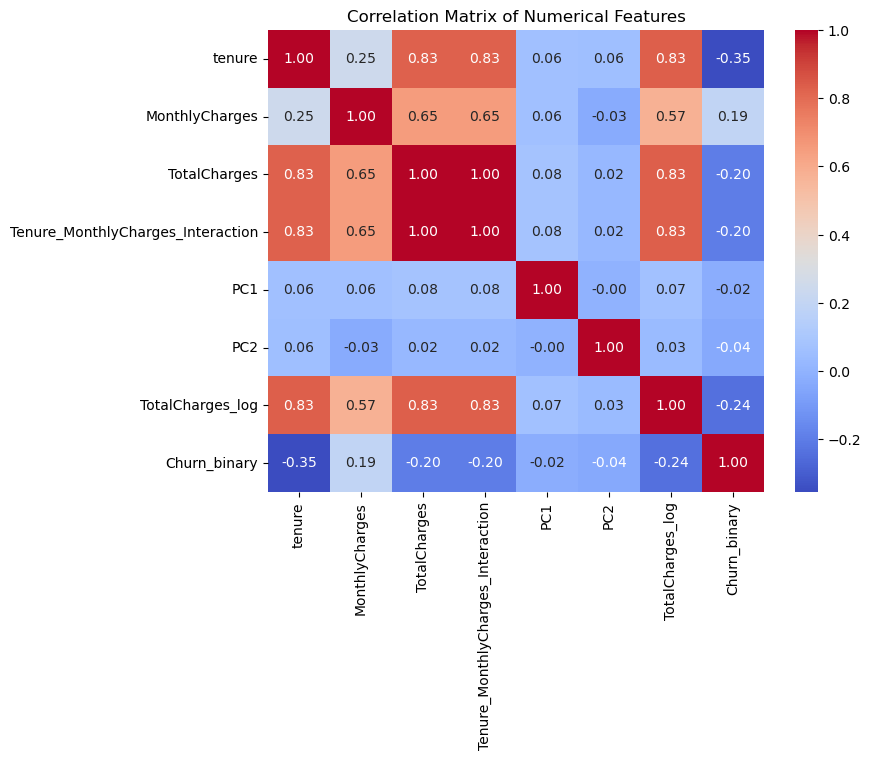

In [100]:
# Heatmap of Correlation Matrix
numerical_df = df.select_dtypes(include=['number']) 
correlation_matrix = numerical_df.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

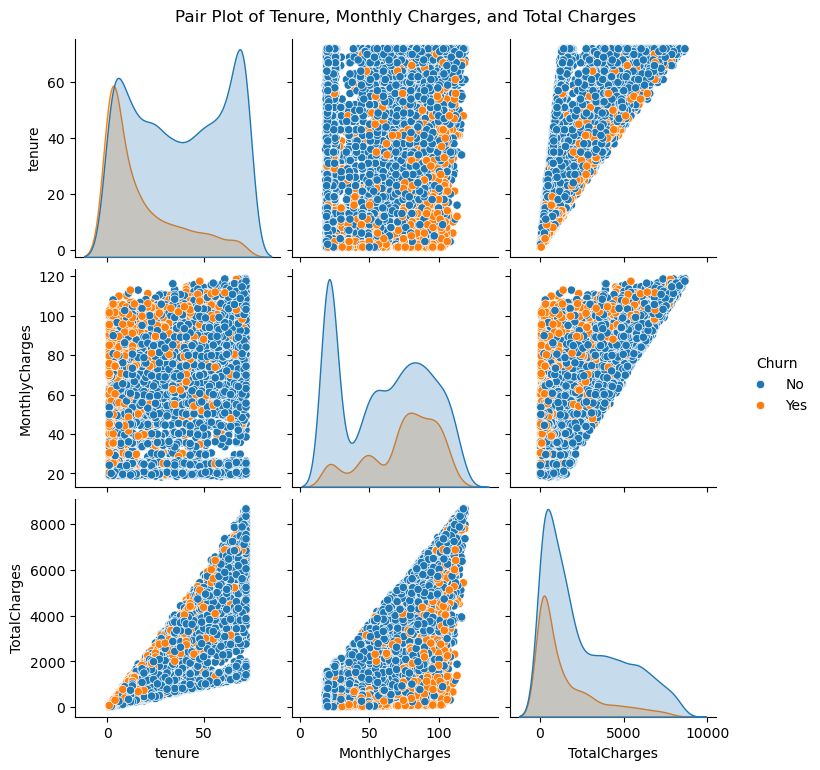

In [101]:
# Create a pair plot 
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pair Plot of Tenure, Monthly Charges, and Total Charges', y=1.02)  # Adjust title position
plt.show()

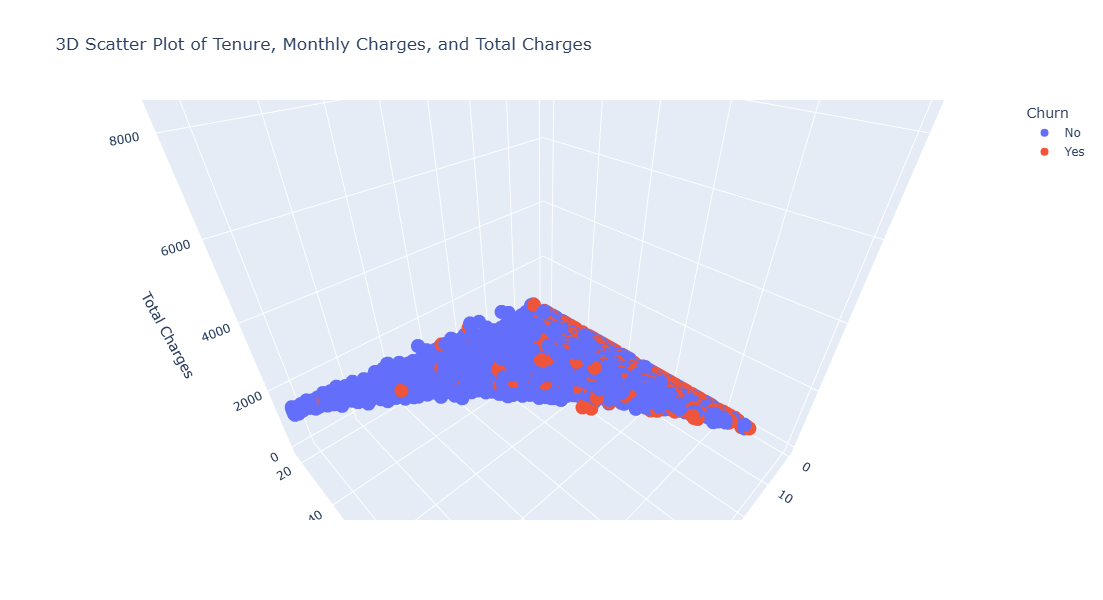

In [103]:
import plotly.express as px
fig = px.scatter_3d(df, x='tenure', y='MonthlyCharges', z='TotalCharges', color='Churn',
                    title='3D Scatter Plot of Tenure, Monthly Charges, and Total Charges')

fig.update_layout(
    scene=dict(
        xaxis_title='Tenure',
        yaxis_title='Monthly Charges',
        zaxis_title='Total Charges'
    ),
    width=800, 
    height=600   
)
fig.show()

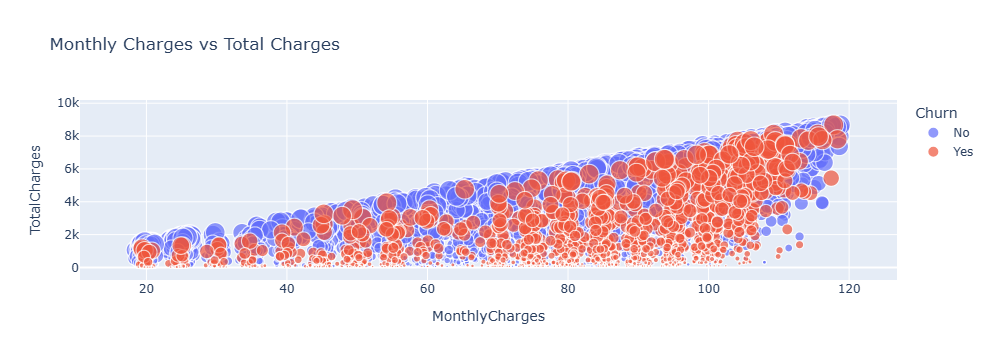

In [105]:
#  Multivariate Scatter Plot -  MonthlyCharges vs TotalCharges, colored by Churn and sized by tenure
fig = px.scatter(df, x='MonthlyCharges', y='TotalCharges', color='Churn', size='tenure',
                 hover_data=['customerID'], title='Monthly Charges vs Total Charges')
fig.show()

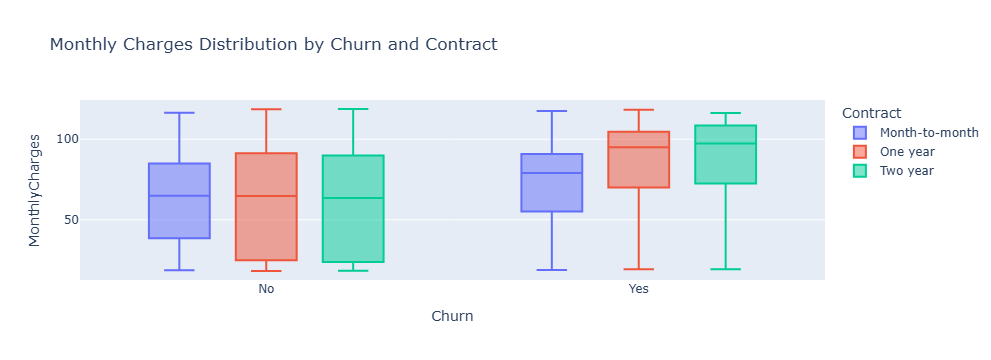

In [106]:
# Interactive Box Plots (Plotly) - Monthly Charges distribution by Churn and Contract
fig = px.box(df, x='Churn', y='MonthlyCharges', color='Contract',
             title='Monthly Charges Distribution by Churn and Contract')
fig.show()

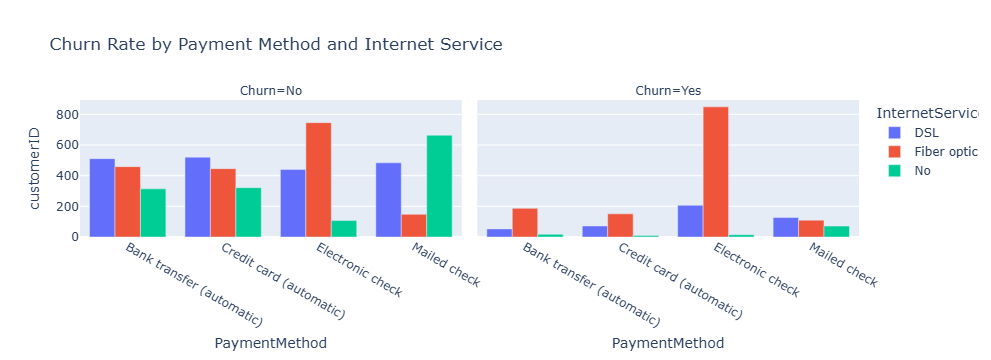

In [108]:
# Churn Rate by Payment Method and Internet Service
churn_payment_internet = df.groupby(['PaymentMethod', 'InternetService', 'Churn'])['customerID'].count().reset_index()
fig = px.bar(churn_payment_internet, x='PaymentMethod', y='customerID', color='InternetService', facet_col='Churn',
             barmode='group', title='Churn Rate by Payment Method and Internet Service')
fig.show()

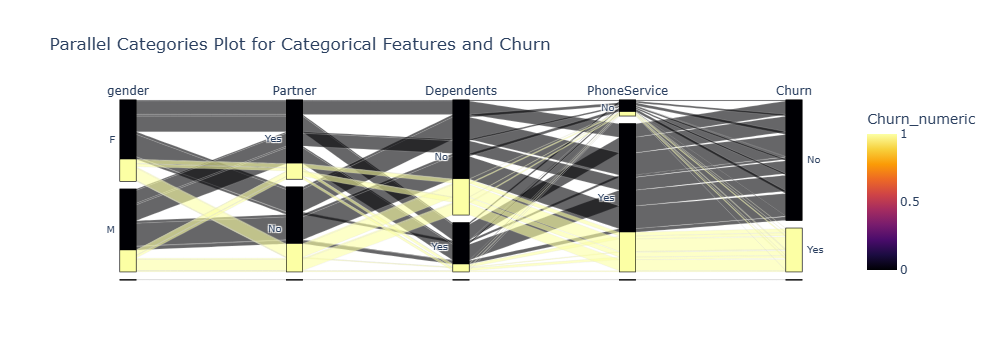

In [109]:
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Create a parallel categories plot
fig = px.parallel_categories(
    df,
    dimensions=['gender', 'Partner', 'Dependents', 'PhoneService', 'Churn'],
    color='Churn_numeric',  
    color_continuous_scale=px.colors.sequential.Inferno, 
    title='Parallel Categories Plot for Categorical Features and Churn'
)

fig.show()

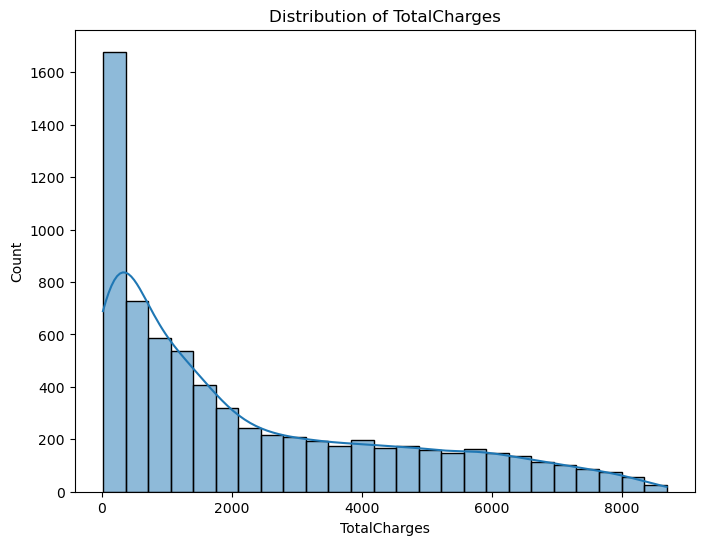

In [111]:
# Check the distribution of 'TotalCharges'  after preprocessing
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges')
plt.show()